In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.metrics as sk
from sewar.full_ref import vifp
from skimage import io, filters



Inputting the data

In [2]:
# Load the numpy arrays back from the .npy files
nuaa_train = np.load('LBP_NUAA_train_data.npy')
nuaa_test = np.load('LBP_NUAA_test_data.npy')
nuaa_label_train = np.load('LBP_NUAA_train_label.npy')
nuaa_label_test = np.load('LBP_NUAA_test_label.npy')

LCC_train = np.load('LBP_LCC_train_data.npy')
LCC_test = np.load('LBP_LCC_test_data.npy')
LCC_label_train = np.load('LBP_LCC_train_label.npy')
LCC_label_test = np.load('LBP_LCC_test_label.npy')

replay_train = np.load('LBP_REPLAY_train_data.npy')
replay_test = np.load('LBP_REPLAY_test_data.npy')
replay_label_train = np.load('LBP_REPLAY_train_label.npy')
replay_label_test = np.load('LBP_REPLAY_test_label.npy')

# print(nuaa_train.shape)
# print(nuaa_test.shape)
# print(nuaa_label_train.shape)
# print(nuaa_label_test.shape)

# print(LCC_train.shape)
# print(LCC_test.shape)
# print(LCC_label_train.shape)
# print(LCC_label_test.shape)

# print(replay_train.shape)
# print(replay_test.shape)
# print(replay_label_train.shape)
# print(replay_label_test.shape)


In [3]:
NUAA = {"train_data": nuaa_train, "test_data": nuaa_test, "train_label": nuaa_label_train, "test_label": nuaa_label_test}
LCC = {"train_data": LCC_train, "test_data": LCC_test, "train_label": LCC_label_train, "test_label": LCC_label_test}
REPLAY = {"train_data": replay_train, "test_data": replay_test, "train_label": replay_label_train, "test_label": replay_label_test}
data_set = {"NUAA": NUAA, "LCC": LCC, "REPLAY": REPLAY}

Fitting on individual datasets

Training and testing on dataset: NUAA
Accuracy: 0.9770114942528736
Confusion Matrix:
[[1487   25]
 [  33  978]]
Error Rate: 0.02298850574712641


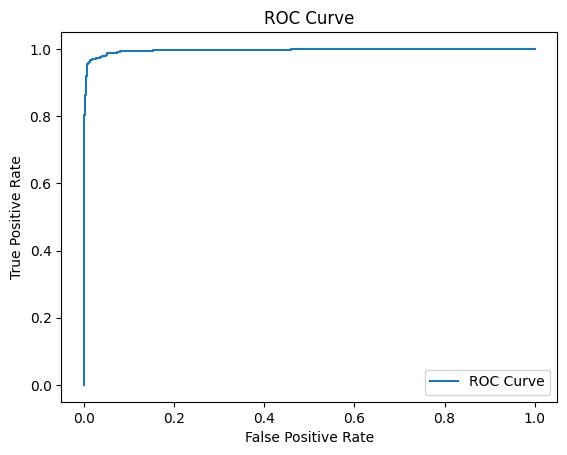

AUC: 0.996077538609685
Precision: 0.9750747756729811
False Acceptance Rate: 0.024925224327018942
False Fake  Rate: 0.024925224327018942
HTER: 0.02331787532140421



Training and testing on dataset: LCC
Accuracy: 0.9194499017681729
Confusion Matrix:
[[6956  356]
 [ 259   64]]
Error Rate: 0.08055009823182713


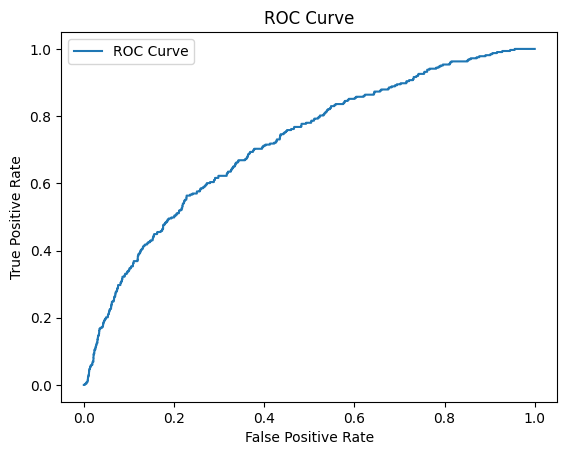

AUC: 0.7187616437799351
Precision: 0.1523809523809524
False Acceptance Rate: 0.8476190476190476
False Fake  Rate: 0.8476190476190476
HTER: 0.44175824175824174



Training and testing on dataset: REPLAY
Accuracy: 0.8666666666666667
Confusion Matrix:
[[3250  350]
 [ 290  910]]
Error Rate: 0.1333333333333333


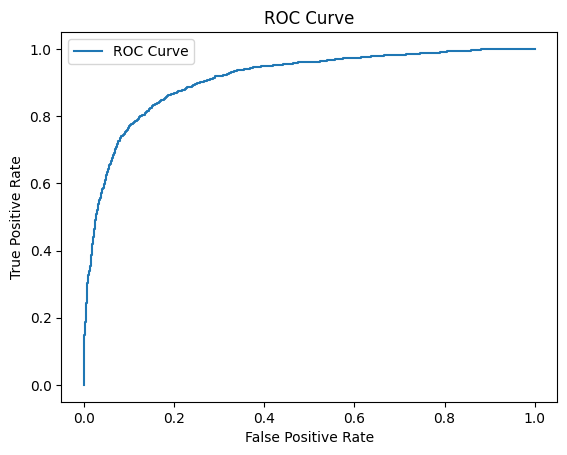

AUC: 0.9109969907407408
Precision: 0.7222222222222222
False Acceptance Rate: 0.2777777777777778
False Fake  Rate: 0.2777777777777778
HTER: 0.17984934086629





In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_score, roc_auc_score
import numpy as np

# Initialize an empty list to store results
results = []

# Iterate over each dataset
for dataset_name, dataset_content in data_set.items():
    # Get the training and testing datasets
    train_data = dataset_content["train_data"]
    train_labels = dataset_content["train_label"]
    test_data = dataset_content["test_data"]
    test_labels = dataset_content["test_label"]

    # Initialize and train the linear discriminant model
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(train_data, train_labels)

    print(f"Training and testing on dataset: {dataset_name}")

    # Evaluate the model on test data
    l_pred = lda_model.predict(test_data)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, l_pred)
    print("Accuracy:", accuracy)

    # Confusion Matrix
    conf_matrix = confusion_matrix(test_labels, l_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Error Rate
    error_rate = 1 - accuracy
    print("Error Rate:", error_rate)

    # ROC Curve
    y_scores = lda_model.decision_function(test_data)
    fpr, tpr, thresholds = roc_curve(test_labels, y_scores)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Area under ROC Curve (AUC)
    auc = roc_auc_score(test_labels, y_scores)
    print("AUC:", auc)

    # Precision
    precision = precision_score(test_labels, l_pred)
    print("Precision:", precision)

    # Calculate False Acceptance Rate (FAR)
    false_acceptance_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
    print("False Acceptance Rate:", false_acceptance_rate)

    # Calculate False Fake Rate (FAR)
    false_fake_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[0, 0])
    print("False Fake  Rate:", false_acceptance_rate)

    # Calculate Half Total Error Rate- HTER
    HTER = (false_acceptance_rate + false_fake_rate) / 2
    print("HTER:", HTER)
    print("\n\n")

    # Append the results to the list
    results.append({"Dataset": dataset_name, "Accuracy": accuracy, "AUC": auc, "Precision": precision,
                    "false_acceptance_rate": false_acceptance_rate, "false_fake_rate": false_fake_rate, "HTER": HTER})

# Print the results
# for result in results:
#     print(result)


Domain Generalisation

For Training Datasets: ('NUAA', 'LCC'), tested on :REPLAY
Accuracy: 0.6552083333333333
Confusion Matrix:
[[2996  604]
 [1051  149]]
Error Rate: 0.3447916666666667


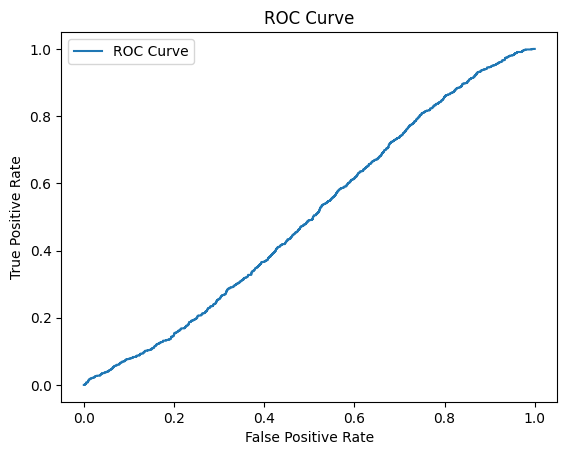

AUC: 0.5006027777777777
Precision: 0.19787516600265603
False Acceptance Rate: 0.8021248339973439
False Fake  Rate: 0.8021248339973439
HTER: 0.5309116880636584




For Training Datasets: ('NUAA', 'REPLAY'), tested on :LCC
Accuracy: 0.7000654878847413
Confusion Matrix:
[[5204 2108]
 [ 182  141]]
Error Rate: 0.2999345121152587


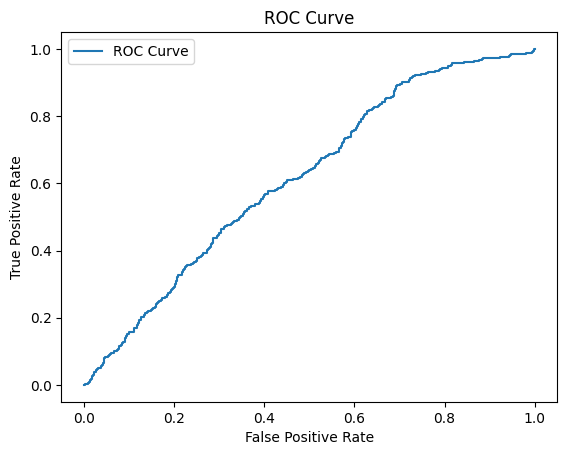

AUC: 0.6159280134949293
Precision: 0.06269453090262339
False Acceptance Rate: 0.9373054690973767
False Fake  Rate: 0.9373054690973767
HTER: 0.4855483899515847




For Training Datasets: ('LCC', 'REPLAY'), tested on :NUAA
Accuracy: 0.6091954022988506
Confusion Matrix:
[[1501   11]
 [ 975   36]]
Error Rate: 0.3908045977011494


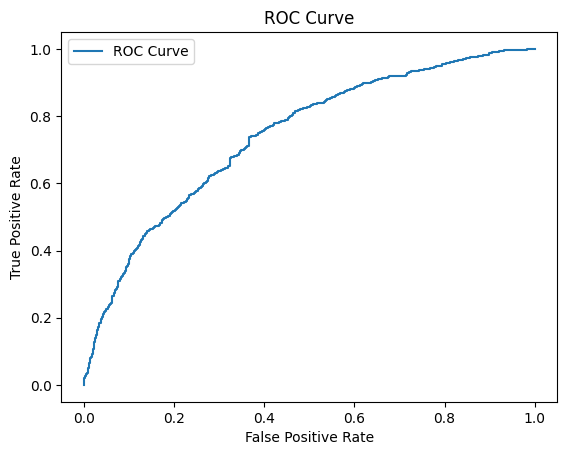

AUC: 0.7402402932818363
Precision: 0.7659574468085106
False Acceptance Rate: 0.23404255319148937
False Fake  Rate: 0.23404255319148937
HTER: 0.31391142199154437






In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import combinations

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_score, roc_auc_score

# Initialize an empty list to store results
results = []

# Iterate over all possible combinations of datasets
for train_dataset_names in combinations(data_set.keys(), 2):
    # Get the names of training and testing datasets
    train_dataset_names = list(train_dataset_names)
    test_dataset_name = [name for name in data_set.keys() if name not in train_dataset_names][0]
    

    # Concatenate training data and labels from selected datasets
    train_data = np.concatenate([data_set[name]["train_data"] for name in train_dataset_names])
    train_labels = np.concatenate([data_set[name]["train_label"] for name in train_dataset_names])

    # Extract testing data and labels
    test_data = data_set[test_dataset_name]["test_data"]
    test_labels = data_set[test_dataset_name]["test_label"]

    # Initialize and train the linear discriminant model
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(train_data, train_labels)

    print(f"For Training Datasets: {train_dataset_names[0],train_dataset_names[1]}, tested on :{test_dataset_name}")

    # Evaluate the model on test data
    accuracy = lda_model.score(test_data, test_labels)
    l_pred = lda_model.predict(test_data)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, l_pred)
    print("Accuracy:", accuracy)

    # Confusion Matrix
    conf_matrix = confusion_matrix(test_labels, l_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Error Rate
    error_rate = 1 - accuracy
    print("Error Rate:", error_rate)

    # ROC Curve
    y_scores = lda_model.decision_function(test_data)
    fpr, tpr, thresholds = roc_curve(test_labels, y_scores)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Area under ROC Curve (AUC)
    auc = roc_auc_score(test_labels, y_scores)
    print("AUC:", auc)

    # Precision
    precision = precision_score(test_labels, l_pred)
    print("Precision:", precision)

    # Calculate False Acceptance Rate (FAR)
    false_acceptance_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
    print("False Acceptance Rate:", false_acceptance_rate)

    # Calculate False Fake Rate (FAR)
    false_fake_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[0, 0])
    print("False Fake  Rate:", false_acceptance_rate)

    # Calculate Half Total Error Rate- HTER
    HTER = (false_acceptance_rate + false_fake_rate)/2
    print("HTER:", HTER)
    print("\n")
    print("\n")
        
    # Append the results to the list
    results.append({"Train Datasets": train_dataset_names, "Test Dataset": test_dataset_name, "Accuracy": accuracy, "AUC":auc,"Precision":
                    precision,"false_acceptance_rate":false_acceptance_rate,"false_fake_rate":false_fake_rate,"HTER":HTER})

# # Print the results
# for result in results:
#     print(result)


Projecting the FEATURE SPACE to a student T distribution

In [14]:
size = 75
# Initialize an empty feature matrix
feature_matrix = np.zeros((6*size, 110))  # Assuming each feature vector has 110 dimensions

# Initialize counters for each class
label_1_count = 0
label_minus_1_count = 0

train_data = nuaa_train
train_label = nuaa_label_train

for i in range(len(train_label)):
    if train_label[i] == 1 and label_1_count < size:
        feature_matrix[label_1_count, :] = train_data[i]
        label_1_count += 1
    elif train_label[i] == -1 and label_minus_1_count < size:
        feature_matrix[200 + label_minus_1_count, :] = train_data[i]
        label_minus_1_count += 1
    if label_1_count > size and label_minus_1_count > size:
        break
    

k = 2*size
# Initialize counters for each class
label_1_count = 0
label_minus_1_count = 0


train_data = replay_train
train_label = replay_label_train

for i in range(len(train_label)):
    if train_label[i] == 1 and label_1_count < size:
        feature_matrix[k+label_1_count, :] = train_data[i]
        label_1_count += 1
    elif train_label[i] == -1 and label_minus_1_count < size:
        feature_matrix[k + size + label_minus_1_count, :] = train_data[i]
        label_minus_1_count += 1
    if label_1_count > size and label_minus_1_count > size:
        break


k = 4*size
# Initialize counters for each class
label_1_count = 0
label_minus_1_count = 0


train_data = LCC_train
train_label = LCC_label_train

for i in range(len(train_label)):
    if train_label[i] == 1 and label_1_count < size:
        feature_matrix[k+label_1_count, :] = train_data[i]
        label_1_count += 1
    elif train_label[i] == -1 and label_minus_1_count < size:
        feature_matrix[k + size + label_minus_1_count, :] = train_data[i]
        label_minus_1_count += 1
    if label_1_count > size and label_minus_1_count > size:
        break

print(label_1_count, label_minus_1_count)

75 75


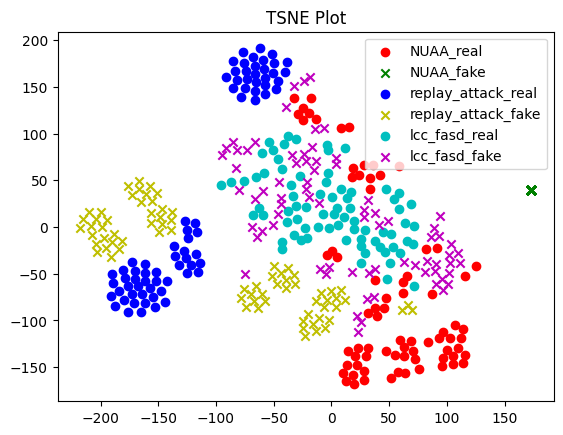

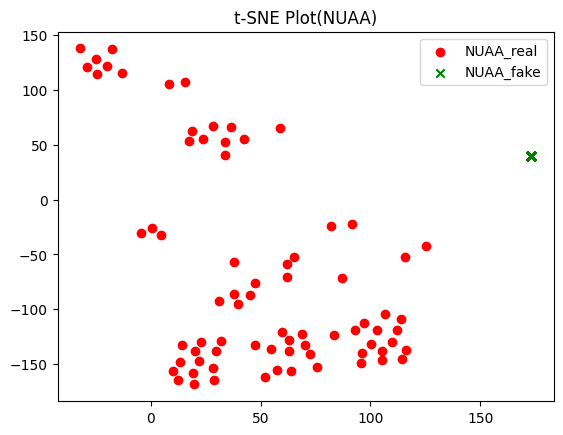

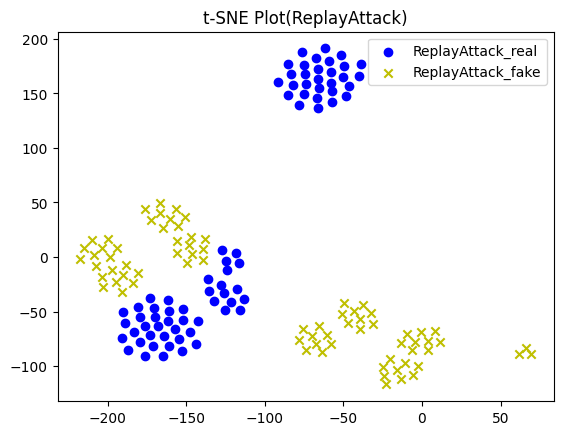

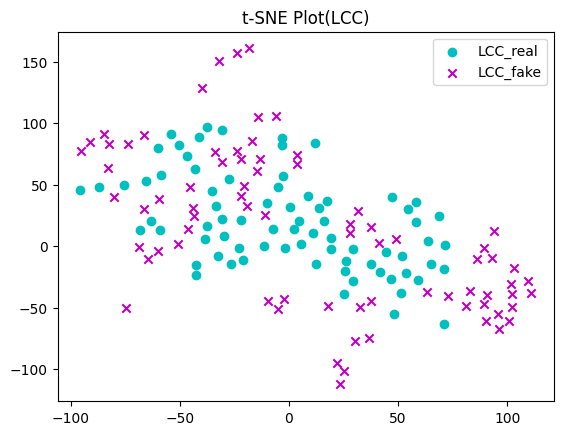

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
# tsne = TSNE(n_components=2)
feature_matrix = tsne.fit_transform(feature_matrix)
batch_size = size

# plt.figure(figsize=(10, 10))
color = ['r', 'g', 'b', 'y', 'c', 'm']
marker = ['o', 'x', 'o', 'x', 'o', 'x']
for i in range(6):
    plt.scatter(feature_matrix[i * batch_size:(i + 1) * batch_size, 0], feature_matrix[i * batch_size:(i + 1) * batch_size, 1], c=color[i], marker=marker[i])
plt.legend(['NUAA_real', 'NUAA_fake', 'replay_attack_real', 'replay_attack_fake', 'lcc_fasd_real', 'lcc_fasd_fake'])
plt.title('TSNE Plot')
plt.savefig("TSNE_Plot")
plt.show()

# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=42)
# # tsne = TSNE(n_components=2)
# feature_matrix = tsne.fit_transform(feature_matrix)
# batch_size = size

# # plt.figure(figsize=(10, 10))
# color = ['r', 'g', 'b', 'y', 'c', 'm']
# marker = ['o', 'x', 'o', 'x', 'o', 'x']
# for i in range(6):
#     plt.scatter(feature_matrix[i * batch_size:(i + 1) * batch_size, 0], feature_matrix[i * batch_size:(i + 1) * batch_size, 1], c=color[i], marker=marker[i])
# plt.legend(['NUAA_real', 'NUAA_fake', 'replay_attack_real', 'replay_attack_fake', 'lcc_fasd_real', 'lcc_fasd_fake'])
# plt.title('TSNE Plot')
# plt.savefig("TSNE_Plot")
# plt.show()

# plt.figure(figsize=(20, 6))
# plt.subplot(1, 3, 1)
for i in range(2):
    plt.scatter(feature_matrix[i * batch_size:(i + 1) * batch_size, 0], feature_matrix[i * batch_size:(i + 1) * batch_size, 1], c=color[i], marker=marker[i])
plt.legend(['NUAA_real', 'NUAA_fake'])
plt.title('t-SNE Plot(NUAA)')
plt.savefig("TSNE_LBP_NUAA.png")
plt.show()

# plt.subplot(1, 3, 2)
for i in range(2, 4):
    plt.scatter(feature_matrix[i * batch_size:(i + 1) * batch_size, 0], feature_matrix[i * batch_size:(i + 1) * batch_size, 1], c=color[i], marker=marker[i])
plt.legend(['ReplayAttack_real', 'ReplayAttack_fake'])
plt.title('t-SNE Plot(ReplayAttack)')
plt.savefig("TSNE_LBP_Replay.png")
plt.show()

# plt.subplot(1, 3, 3)
for i in range(4, 6):
    plt.scatter(feature_matrix[i * batch_size:(i + 1) * batch_size, 0], feature_matrix[i * batch_size:(i + 1) * batch_size, 1], c=color[i], marker=marker[i])
plt.legend(['LCC_real', 'LCC_fake'])
plt.title('t-SNE Plot(LCC)')
plt.savefig("TSNE_LBP_LCC.png")
plt.show()
